Función para mostrar resultados

In [2]:
# Graficar histograma de las variables generadas
def show_variates(variates_list,num_bins,title):
  plt.hist(variates_list,bins=num_bins) # Entre mayor número 'bins', más preciso el histograma
  plt.xlabel("Valores")
  plt.ylabel("Frecuencia")
  plt.title(title)
  plt.grid(True)
  plt.show()

Librerías

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Punto 1,a
Generar por el método de la transformada inversa, números al azar que sigan la siguiente distribución de probabilidad:

![Enunciado](images_1/enunciado_a.png)
![Enunciado](images_1/funciones_a.png)

Generación de variables

In [5]:
np.random.seed(0)

# PARÁMETROS DE LA DISTRIBUCIÓN TRIANGULAR
a=3
b=4
c=5

def generator_a_1(a,b,c,rand_u):
  return a + math.sqrt(rand_u*(c-a)*(b-a))

def generator_a_2(a,b,c,rand_u):
  return c - math.sqrt((1-rand_u)*(c-a)*(c-b))

iterations = 1000000
variates_a = []
for i in range(0,iterations):
  rand_u = np.random.uniform(0,1)
  if rand_u <= (b-a)/(c-a):
    variates_a.append(generator_a_1(a,b,c,rand_u))
  else:
    variates_a.append(generator_a_2(a,b,c,rand_u))


Reporte de resultados

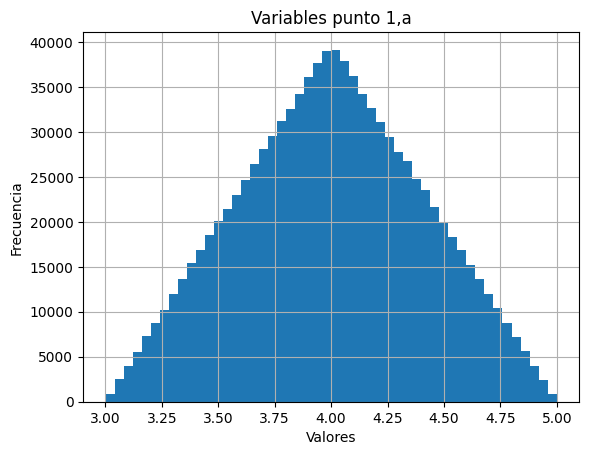

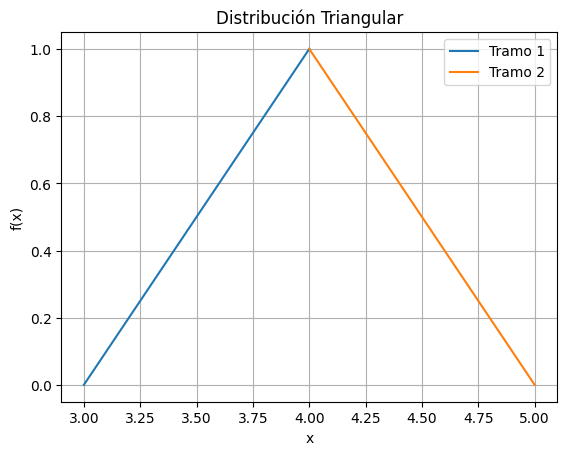

In [7]:
# GRAFICA DE LAS VARIABLES GENERADAS POR TRANSFORMADA INVERSA
show_variates(variates_a,50,"Variables punto 1,a")

# GRAFICA DE LA DISTRIBUCIÓN TRIANGULAR
def funcion1(x,a,b,c):
  return (2*(x-a))/((c-a)*(b-a))

def funcion2(x,a,b,c):
  return (2*(c-x))/((c-a)*(c-b))

dominio_1 = np.linspace(a,b, 100)
dominio_2 = np.linspace(b,c, 100)

# Calcular los puntos para cada tramo
tramo_1 = funcion1(dominio_1,a,b,c)
tramo_2 = funcion2(dominio_2,a,b,c)

# Graficar los tramos
plt.plot(dominio_1, tramo_1, label="Tramo 1")
plt.plot(dominio_2, tramo_2, label="Tramo 2")

# Agregar etiquetas y título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Distribución Triangular")
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()